<a href="https://colab.research.google.com/github/Aldistwn29/Experience_Perusahaan_Quantum/blob/main/ritel_quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
df.shape

(264834, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [ ]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


# Cek Missing value dan Duplikat

In [3]:
missing_value = df.isnull().sum()
print(f"Jumalh Missing value:{missing_value}")

Jumalh Missing value:LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    1
dtype: int64


In [4]:
duplicat = df.duplicated().sum()
print(f"Jumlah Duplicated:{duplicat}")

df = df.drop_duplicates()
print("Jumlah duplikat setelah dihapus:", df.duplicated().sum())

Jumlah Duplicated:0
Jumlah duplikat setelah dihapus: 0


In [ ]:
df.shape

(264833, 12)

# Feature Engineering

# Konversi tipe data DATE ke tipe data datetime dan Menambahkan kolom YEAR, MONTH, DAY

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [6]:
df['YearMonth'] = df['DATE'].dt.strftime('%Y-%m')

In [ ]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YearMonth
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


# Menghitung matrik bulanan dari setiap toko

In [7]:
measure_over_time = df.groupby(['STORE_NBR', 'YearMonth']).agg(
    total_seles = ('TOT_SALES', 'sum'),
    jumlah_cust = ('LYLTY_CARD_NBR', 'nunique'),
    jumlah_transaksi = ('LYLTY_CARD_NBR', lambda x : len(x) / x.nunique()),
    jumlah_produk = ('PROD_QTY', 'sum'),
    rerata_harga_units = ('TOT_SALES', lambda x: x.sum() / df.loc[x.index, 'PROD_QTY'].sum())
).reset_index()

In [ ]:
measure_over_time.head(10)

,STORE_NBR,YearMonth,total_seles,jumlah_cust,jumlah_transaksi,jumlah_produk,rerata_harga_units
0,1,2018-07,206.9,49,1.061224,62,3.337097
1,1,2018-08,176.1,42,1.023810,54,3.261111
2,1,2018-09,278.8,59,1.050847,75,3.717333
3,1,2018-10,188.1,44,1.022727,58,3.243103
4,1,2018-11,192.6,46,1.021739,57,3.378947
5,1,2018-12,189.6,42,1.119048,57,3.326316
6,1,2019-01,154.8,35,1.028571,42,3.685714
7,1,2019-02,225.4,52,1.057692,65,3.467692
8,1,2019-03,192.9,45,1.088889,58,3.325862
9,1,2019-04,192.9,42,1.023810,57,3.384211


# Fiter ke Priode pre-trial dan toko dengan observasi lengkap

In [8]:
# Menentukan dengan observasi lengkap
full_obs_stroes = measure_over_time.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()

# filter data dengan toko observasi lengkap dan priode pre-trial
pre_trial_measure = measure_over_time[(measure_over_time['YearMonth'] < '201902') & (measure_over_time['STORE_NBR'].isin(full_obs_stroes))]
pre_trial_measure.head(20)

,STORE_NBR,YearMonth,total_seles,jumlah_cust,jumlah_transaksi,jumlah_produk,rerata_harga_units
0,1,2018-07,206.9,49,1.061224,62,3.337097
1,1,2018-08,176.1,42,1.023810,54,3.261111
2,1,2018-09,278.8,59,1.050847,75,3.717333
3,1,2018-10,188.1,44,1.022727,58,3.243103
4,1,2018-11,192.6,46,1.021739,57,3.378947
5,1,2018-12,189.6,42,1.119048,57,3.326316
6,1,2019-01,154.8,35,1.028571,42,3.685714
7,1,2019-02,225.4,52,1.057692,65,3.467692
8,1,2019-03,192.9,45,1.088889,58,3.325862
9,1,2019-04,192.9,42,1.023810,57,3.384211


# Membuat Fungsi korelasi untuk menghitung korelasi

In [77]:
def calculate_correlation(input_table, metric_col, store_comparasion):
  result = []
  trial_store_data = input_table[input_table['STORE_NBR'] == store_comparasion][metric_col]

  for store in input_table['STORE_NBR'].unique():
    if store != store_comparasion:
        control_store_data = input_table[input_table['STORE_NBR'] == store_comparasion][metric_col]
        correlation = np.corrcoef(trial_store_data, control_store_data)[0, 1]
        result.append({'Store1' : store_comparasion, 'Store2': store, 'corr_measure': correlation})
  return pd.DataFrame(result)


def calculate_magnitude_distance(input_table, metric_col, store_comparasion):
  clac_dist_table = []
  store_numbers = input_table['STORE_NBR'].unique()

  for store in store_numbers:
    for month in input_table['YearMonth'].unique():
      store_comparasion_data = input_table[(input_table['STORE_NBR'] == store_comparasion) & (input_table['YearMonth'] == month)]
      control_store_data = input_table[(input_table['STORE_NBR'] == store) & (input_table['YearMonth'] == month)]
      # hitung perbedaan absolut untuk metrik
      measure_dif = abs(store_comparasion_data[metric_col].values[0] - control_store_data[metric_col].values[0])

      clac_dist_table.append({'Store1': store_comparasion, 'Store2': store, 'YearMonth': month, 'measure':measure_dif})

      # ubah daftar menjadi dataframe
      dist_df = pd.DataFrame(clac_dist_table)

      # Standarisasi jarak magnitudo (normalisasi min-mks)
      min_max_dist = dist_df.groupby(['Store1', 'YearMonth'])['measure'].agg(['min', 'max']).reset_index()
      dist_df = pd.merge(dist_df, min_max_dist, on = ['Store1', 'YearMonth'])


      # Hitung jarak standarisasi
      dist_df['magnitudeMeasure'] = dist_df.apply(lambda row: 1 if row['min'] == row['max'] else 1 - (row['measure'] - row['min']) / (row['max'] - raw['min']), axis=1)

      # Hitung besaran rata rata untuk setiap stroe1 dan store2
      final_dist_table = dist_df.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()

      return final_dist_table

# Menghitung korelasi
cor_results = calculate_correlation(pre_trial_measure, 'total_seles',  77)
print("hasil korelasi:\n", cor_results.head())

# Menghitung magnitudo
mag_results = calculate_magnitude_distance(pre_trial_measure, 'total_seles', 77)
mag_results.head(10)
print("\nhasil magnitudo:\n", mag_results.head(10))

hasil korelasi:
    Store1  Store2  corr_measure
0      77       1           1.0
1      77       2           1.0
2      77       3           1.0
3      77       4           1.0
4      77       5           1.0

hasil magnitudo:
    Store1  Store2  magnitudeMeasure
0      77       1               1.0


# Percobaan ke dua

In [80]:
# Fungsi untuk menghitung korelasi
def calculate_correlation_2(data, trial_store, column):
    if trial_store not in data['STORE_NBR'].values:
      print("Id toke {trial_score} tidak ditemukan")
      return None

    # Data toko percobaan
    trial_data = data[data['STORE_NBR'] == trial_store].set_index('YearMonth')[column]

    # Data toko lain
    other_stores = data[data["STORE_NBR"] != trial_store].set_index('YearMonth')

    # Menghitung korelasi trial store dan toko lainnya
    corrlations = other_stores.groupby('STORE_NBR').apply(lambda x: x[column].corr(trial_data))

    # reset index untuk mengubah series menjadi dataframe
    corrlations = corrlations.reset_index()
    corrlations.columns = ['STORE_NBR', 'correlation']
    return corrlations

# Fungsi untuk menghitung magnitudo
def calculate_magnitude_distance_2(data, trial_store, column):
    # validasi store id
    if trial_store not in data['STORE_NBR'].values:
      print("Id Store {trial_store} tidak ditemukan")
      return None

    # Nilai rata-rata toko percobaan
    trial_value = data.loc[data['STORE_NBR'] == trial_store, column].mean()

    # Menghitung jarak magnitudo
    data['magitude_distance'] = abs(data[column] - trial_value)
    return data[['STORE_NBR', 'magitude_distance']].drop_duplicates()

# Menghitung korelasi
trial_store = 77
corr_nSales = calculate_correlation_2(pre_trial_measure, trial_store, 'total_seles')
corr_Ncust = calculate_correlation_2(pre_trial_measure, trial_store, 'jumlah_cust')

# Menghitung magnitudo
mag_nSales = calculate_magnitude_distance_2(pre_trial_measure, trial_store, 'total_seles')
mag_Ncust = calculate_magnitude_distance_2(pre_trial_measure, trial_store, 'jumlah_cust')

# Menggabungkan skor korelasi dan magnitudo
corr_weight = 0.5
mag_weight = 1 - corr_weight

# Membuat table skor
score_nSales = pd.merge(corr_nSales, mag_nSales, on='STORE_NBR')
score_nSales['scoreNSales'] = corr_weight * score_nSales['correlation'] + mag_weight * score_nSales['magitude_distance']

score_nCust = pd.merge(corr_Ncust, mag_Ncust, on='STORE_NBR')
score_nCust['scoreNcust'] = corr_weight * score_nCust['correlation'] + mag_weight * score_nCust['magitude_distance']

# Menggabungkan skor untuk table total penjualan dan total customer
score_control = pd.merge(score_nSales, score_nCust, on='STORE_NBR')
score_control['finalControlScore'] = 0.5 * score_control['scoreNSales'] + 0.5 * score_control['scoreNcust']
# Memilih toko dengan skor tertinggi
control_store = score_control.loc[score_control['finalControlScore'].idxmax(), 'STORE_NBR']

print(f"Toko control yang paling mirip adalah {control_store}")

Toko control yang paling mirip adalah 58


<ipython-input-80-bb7db722fb60>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrlations = other_stores.groupby('STORE_NBR').apply(lambda x: x[column].corr(trial_data))
<ipython-input-80-bb7db722fb60>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrlations = other_stores.groupby('STORE_NBR').apply(lambda x: x[column].corr(trial_data))
<ipython-input-80-bb7db722fb60>:32: SettingWithCopyWarning: 
A

# Exploratory Data Analysis

# Bagaimana penjualan perbulannya

Visualisasi menggunakan linechat untuk menjawab pertanyaan diatas.

Toko kontrol adalah 58


<ipython-input-87-69c57ca3d0dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_trial_measure['store_type'] = pre_trial_measure['STORE_NBR'].apply(lambda x: 'Trial' if x == 77 else ('Control' if x == control_corr_store else 'Other Stores'))


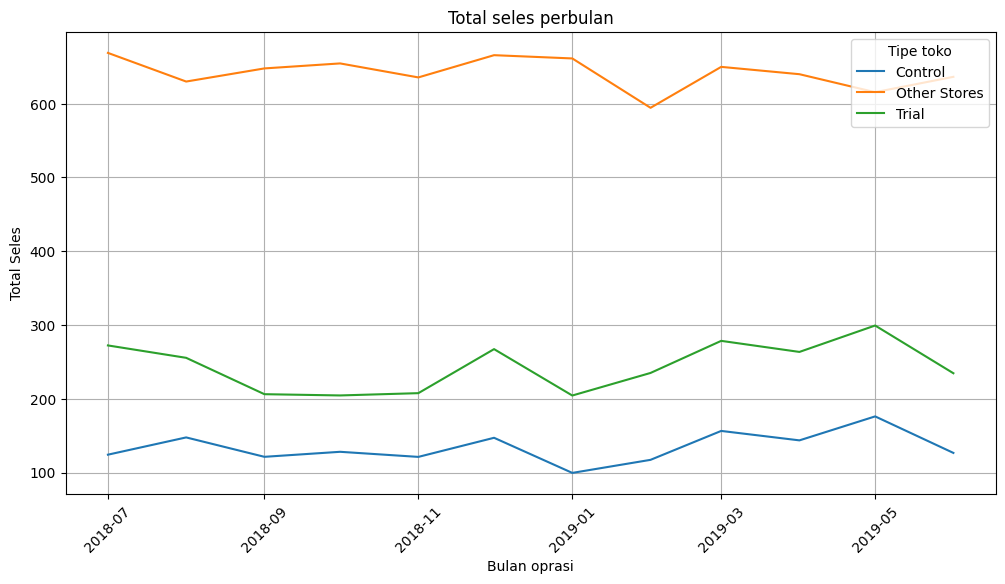

In [87]:
# Mengurutkan korelasi pada variabel corr_nSales
sorted_corr = corr_nSales.sort_values(by='correlation', ascending=False)
control_corr_store = sorted_corr[sorted_corr['STORE_NBR']!= 77].iloc[0]['STORE_NBR']
print(f"Toko kontrol adalah {control_store}")

# membuat kolom untuk tipe toko
pre_trial_measure['store_type'] = pre_trial_measure['STORE_NBR'].apply(lambda x: 'Trial' if x == 77 else ('Control' if x == control_corr_store else 'Other Stores'))

# Menghitung rata rata total sales berdasarkan tipe toko dan tahun-bulan
sales_by_month = pre_trial_measure.groupby(['YearMonth', 'store_type'])['total_seles'].mean().reset_index()

# Mengconversi YearMonth ke dalam kolom datetim
sales_by_month['TransactionMonth'] = pd.to_datetime(sales_by_month['YearMonth'].astype(str), format='%Y-%m')

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='TransactionMonth', y='total_seles', hue='store_type')
plt.xlabel('Bulan oprasi')
plt.ylabel('Total Seles')
plt.title('Total seles perbulan')
plt.legend(title='Tipe toko', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* **tren penjulan perbulan**
- pada type toko control : trendnya stabil sekitar 100 - 200, terjadi peningkatan di akhir priode akan tetapi mengalami penuranan kemabli\.
- pada type other store : trend yang memiliki penjualan tertinggi, jika di bandingkan dengan control dan trail, terdapat fluktuasi yang signifikan, puncaknya penjualan tertinggi di sekitr 650.
- pada type Trail: trendnya tampak seperti other store tetapi dalam skala kecil, terjadi kenaikan penjualan pada akhir priode.

* **Kesimpulan** :\
Bedasarkan grafik di atas yang memiliki penjualan tertinggi setiap bulannya yaitu other store, sedangkan yang memiliki potensi yang baik diakhir priode. akan tetapi perlu dicari dan di analisis lebih dalam lagi mengenai faktor penyebab fluktuasi.

